# Install required libraries

In [1]:
# install pycaret and shap for modeling
# #!pip install pycaret ydata-profiling shap

**Go to Runtime --> Restart Runtime. If you do not restart you will get error later in this notebook.**

# Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Content** <br/>
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

**Inspiration** <br/>
This relatively simple dataset should be an excellent starting point for EDA, Statistical Analysis and Hypothesis testing and training Linear Regression models for predicting Insurance Premium Charges.

Proposed Tasks:
- Exploratory Data Analytics
- Statistical hypothesis testing
- Statistical Modeling
- Linear Regression

Reference: https://www.kaggle.com/datasets/mirichoi0218/insurance


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# average charges
data['charges'].mean()

13270.422265141257

<Axes: >

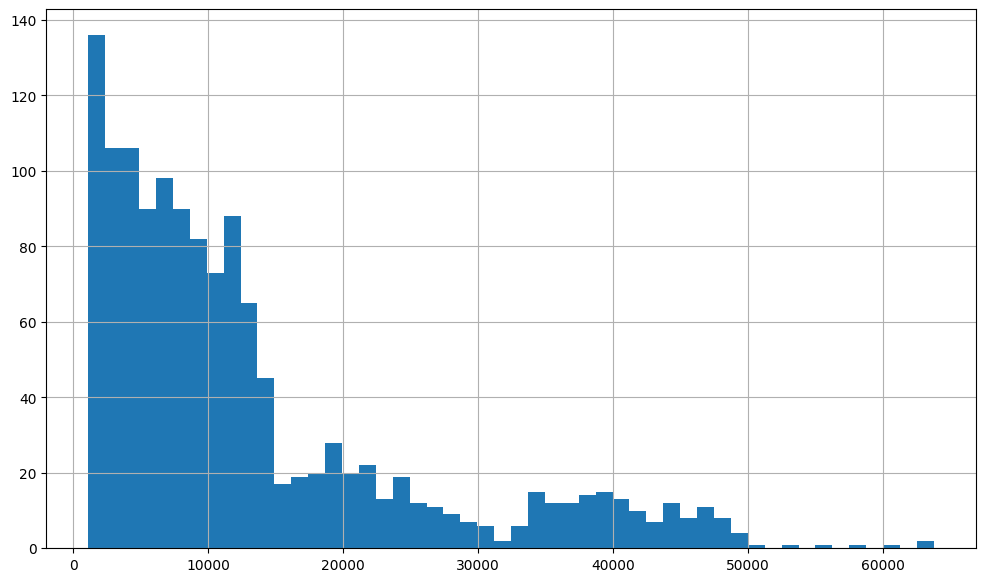

In [7]:
%matplotlib inline
# average charges histogram
data['charges'].hist(bins=50, figsize = (12,7))

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Training and Selection

In [9]:
from pycaret.regression import *
s = setup(data, target = 'charges',  session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [10]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1140
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.2180
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,1.8160
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.2260
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0560
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0490
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0440
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0560
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0410
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0530


In [11]:
# check the best model
best

GradientBoostingRegressor(random_state=123)

In [12]:
# create model
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3244.6173,45002914.9978,6708.4212,0.7312,0.5884,0.4883
1,3121.3069,45456737.6696,6742.1612,0.7357,0.5398,0.3300
2,3646.2662,54445682.2627,7378.7318,0.3107,0.6475,0.4752
3,3228.2250,44536493.7924,6673.5668,0.6281,0.5698,0.4253
4,4344.7470,65261429.3013,8078.4546,0.5146,0.7261,0.6008
5,3497.9281,42984919.0254,6556.2885,0.7235,0.4614,0.3208
6,3464.9372,51736922.8950,7192.8383,0.6480,0.5064,0.3792
7,2804.7111,37461846.7208,6120.6084,0.7940,0.4737,0.1787
8,3080.1801,42102090.8846,6488.6124,0.7281,0.5168,0.4537


In [13]:
# hyperparameter tuning
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1745.0008,18073621.2534,4251.3082,0.8920,0.3408,0.1390
1,2380.2671,33969297.4978,5828.3186,0.8025,0.4803,0.1491
2,2005.5481,23477540.5275,4845.3628,0.7027,0.4742,0.1604
3,1986.9419,22156779.8636,4707.0989,0.8150,0.3731,0.1550
4,2255.0797,28517151.4384,5340.1453,0.7879,0.4832,0.1465
5,1961.7810,20794913.6607,4560.1440,0.8662,0.3653,0.1287
6,1643.3779,20046377.2842,4477.3181,0.8636,0.3309,0.1144
7,2049.2066,26281892.4673,5126.5868,0.8555,0.4653,0.1298
8,1991.8599,23667668.4391,4864.9428,0.8471,0.3865,0.1452


Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Model Analysis

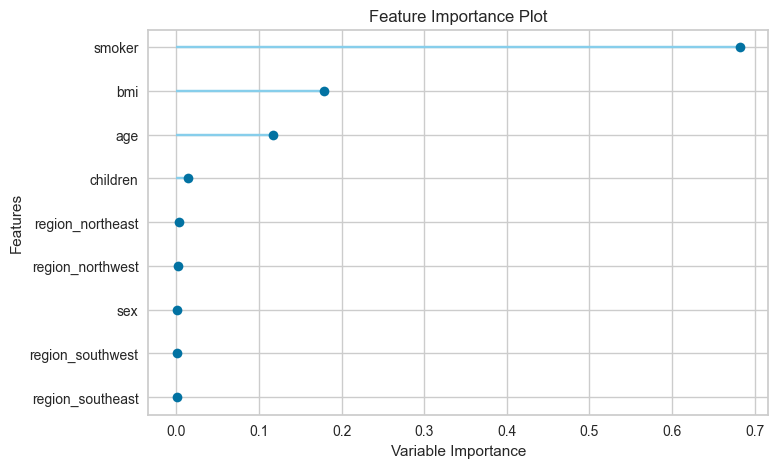

In [14]:
# feature importance
plot_model(best, plot = 'feature')

What do you observe here? What is the most important feature for the model? Can you comment on how it effects the target variable i.e. `charges`. Does `smoker_yes` increase the charges or decrease it?

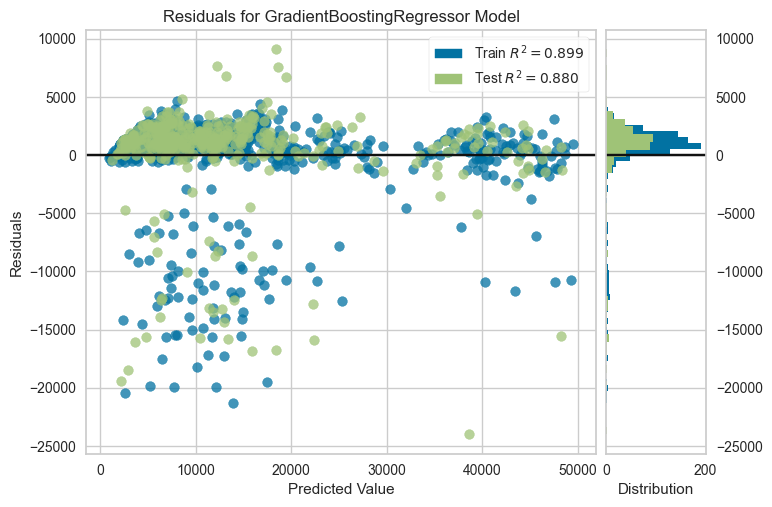

In [15]:
# residuals plot
plot_model(best, plot = 'residuals')

Do you know what is residuals plot? what does it show? x-axis in the plot above is predicted value and y-axis is residuals (residuals = actual - predicted). [Learn more about it](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/).

# Model Explainability

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2774.1660,20197362.2929,4494.1476,0.8794,0.4443,0.3665
1,3226.3582,32217255.9870,5676.0247,0.8127,0.4966,0.3623
2,2978.3324,23831726.8933,4881.7750,0.6983,0.5284,0.4571
3,2964.2723,21652873.1445,4653.2648,0.8192,0.5029,0.4709
4,3109.0784,26023300.4335,5101.3038,0.8065,0.4862,0.3559
5,2962.0512,21148855.6638,4598.7885,0.8640,0.4185,0.3314
6,2725.4467,21714018.8331,4659.8303,0.8522,0.4499,0.3877
7,3029.3634,23548579.1501,4852.6878,0.8705,0.4876,0.3991
8,2988.0070,21602121.6207,4647.8083,0.8605,0.4832,0.4251


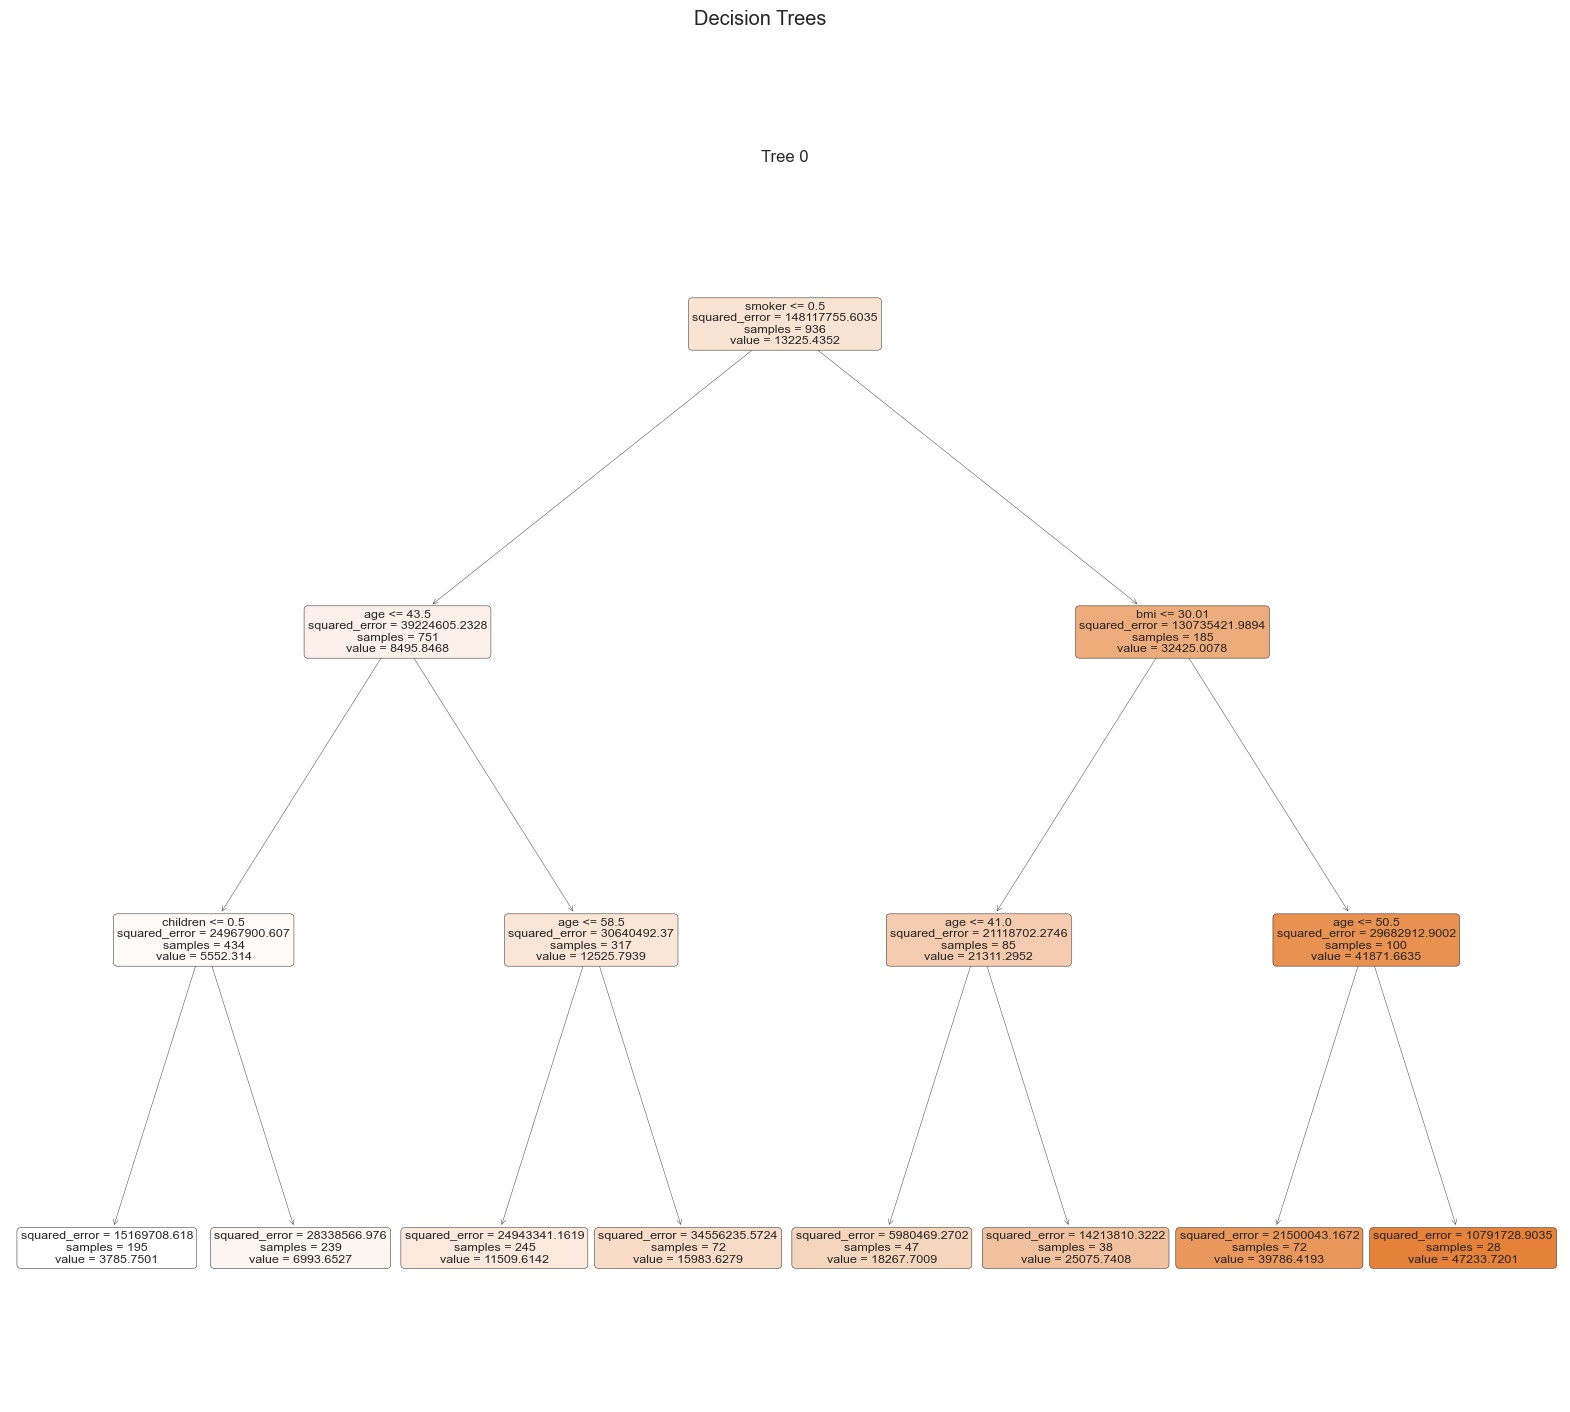

In [16]:
# visualize decision tree
dt_limited = create_model('dt', max_depth=3)
plot_model(dt_limited, plot = 'tree')

Do you understand what this tree means? We have created a Decision Tree model with depth = 3. What is the most important feature based on this tree?

In [17]:
# train lightgbm model for shap values
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2896.4964,23611929.4013,4859.2108,0.8590,0.5993,0.3808
1,3075.9419,30047230.7486,5481.5354,0.8253,0.4622,0.3295
2,3090.7426,27877897.1696,5279.9524,0.6470,0.6213,0.4468
3,3247.8918,26531240.5577,5150.8485,0.7785,0.7497,0.5276
4,3263.7660,29391206.7843,5421.3658,0.7814,0.5628,0.3846
5,2930.1800,21751409.5632,4663.8406,0.8601,0.4058,0.2873
6,2733.8071,21012815.3865,4583.9738,0.8570,0.3991,0.3139
7,2865.5796,25843408.7132,5083.6413,0.8579,0.5027,0.2995
8,2715.5680,21671018.5929,4655.2141,0.8600,0.5233,0.4192


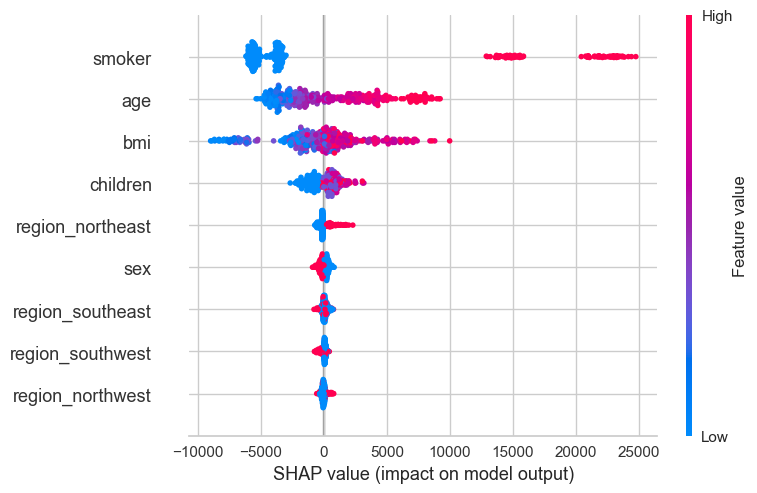

In [18]:
# summary plot
interpret_model(lightgbm)

In [19]:
# patient number 0. profile
print(get_config('X_test').iloc[0])
print(get_config('y_test').iloc[0])

age                49
sex            female
bmi             42.68
children            2
smoker             no
region      southeast
Name: 650, dtype: object
9800.889


In [20]:
interpret_model(lightgbm, plot = 'reason', observation = 0)

In [21]:
# patient number 2. profile
print(get_config('X_test').iloc[2])
print(get_config('y_test').iloc[2])

age                27
sex            female
bmi              31.4
children            0
smoker            yes
region      southwest
Name: 314, dtype: object
34838.87


In [22]:
# patient number 2. profile
get_config('X_test').iloc[2]

age                27
sex            female
bmi              31.4
children            0
smoker            yes
region      southwest
Name: 314, dtype: object

In [23]:
interpret_model(lightgbm, plot = 'reason', observation = 2)

What is the difference you observe in prediction for patient 0 and patient 2?

# Finalize Model for Deployment

In [24]:
final_best = finalize_model(best)

In [25]:
save_model(final_best, 'hospital_charges_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(